In [110]:
#imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
#importing datasets
train = pd.read_csv("train.csv", nrows = 5000000)
test = pd.read_csv("test.csv")

In [3]:
train.shape

(5000000, 8)

In [ ]:
## Data Cleaning 
#1)Checked Null values , removed the nulls
#2)Removed fair< 0
#3) Removed no. of passengers >6
#4) longitude, latitides < > 180


In [124]:
test.shape

(9914, 7)

In [118]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [119]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,5.000000e+06,5.000000e+06,5.000000e+06,4.999964e+06,4.999964e+06,5.000000e+06
mean,1.134080e+01,-7.250678e+01,3.991974e+01,-7.250652e+01,3.991725e+01,1.684695e+00
std,9.820175e+00,1.280970e+01,8.963509e+00,1.284777e+01,9.486767e+00,1.331854e+00
min,-1.000000e+02,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399206e+01,4.073491e+01,-7.399139e+01,4.073404e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396711e+01,4.076711e+01,-7.396367e+01,4.076811e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,3.310364e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [120]:
train.isnull().sum().sort_values(ascending=False)

dropoff_longitude    36
dropoff_latitude     36
key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
passenger_count       0
dtype: int64

In [8]:
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [9]:
train.shape


(4999964, 8)

In [10]:
train['fare_amount'].describe()

count    4.999964e+06
mean     1.134074e+01
std      9.820066e+00
min     -1.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [11]:
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 4999753, True: 211})

In [12]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(4999753, 8)

In [13]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    4.999753e+06
mean     1.134159e+01
std      9.819001e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [14]:
#highest fare is $500
train['fare_amount'].sort_values(ascending=False).head()

1144706    1273.31
4894706     952.00
3723759     698.16
3206977     542.83
3316931     500.00
Name: fare_amount, dtype: float64

In [15]:
train['passenger_count'].describe()

count    4.999753e+06
mean     1.684702e+00
std      1.331848e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

In [16]:
#max is 208 passengers. Assuming that a bus is a 'taxi' in NYC, I don't think a bus can carry 208 passengers! Let' see the distribution of this field
#LOL! One field. this is DEFINITELY an outlier. Lets drop it 
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.30,2009-07-30 11:54:00 UTC,0.000000,0.000000,0.000000,0.000000,208
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00 UTC,-74.015780,40.715420,-74.170280,40.708340,9
2154045,2010-12-16 11:21:00.000000209,3.30,2010-12-16 11:21:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2198549,2010-12-15 14:20:00.00000010,3.30,2010-12-15 14:20:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2910347,2010-12-16 06:44:00.00000039,4.50,2010-12-16 06:44:00 UTC,0.000000,0.000000,0.000000,0.000000,208
3107489,2009-05-12 14:50:00.000000175,2.70,2009-05-12 14:50:00 UTC,-73.937818,40.758260,-73.937827,40.758250,208
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:16 UTC,-73.982094,40.756252,-73.872482,40.774506,9
4103745,2010-12-22 12:11:00.000000230,23.70,2010-12-22 12:11:00 UTC,0.000000,0.000000,0.000000,0.000000,208
4432483,2009-05-11 13:56:00.00000088,11.10,2009-05-11 13:56:00 UTC,-73.937733,40.758267,-73.937737,40.758273,208


In [17]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [18]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00 UTC,-74.015780,40.715420,-74.170280,40.708340,9
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:16 UTC,-73.982094,40.756252,-73.872482,40.774506,9
4467314,2015-01-01 21:32:16.0000007,8.50,2015-01-01 21:32:16 UTC,-74.005867,40.740643,-73.988045,40.735100,7
4679603,2010-02-20 01:53:00.00000037,9.30,2010-02-20 01:53:00 UTC,0.554830,0.000000,-2069.478952,28.121107,51


In [19]:
train['passenger_count'].describe()


count    4.999746e+06
mean     1.684413e+00
std      1.309285e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.290000e+02
Name: passenger_count, dtype: float64

In [20]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()


count    4.999746e+06
mean     3.991991e+01
std      8.963290e+00
min     -3.488080e+03
25%      4.073491e+01
50%      4.075263e+01
75%      4.076711e+01
max      3.310364e+03
Name: pickup_latitude, dtype: float64

Quick Googling gave me this info

Latitudes range from -90 to 90.
Longitudes range from -180 to 180.
The above describe clearly shows some outliers. Let's filter them

In [21]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
1281413,2011-09-02 22:51:00.000000213,11.3,2011-09-02 22:51:00 UTC,-2256.421232,-1185.391185,-2256.421232,-1185.391185,1
1340837,2011-06-09 10:39:00.000000137,10.1,2011-06-09 10:39:00 UTC,2434.238557,-3458.664702,-1281.933787,-104.637653,1
1388984,2012-01-18 21:33:00.00000068,11.3,2012-01-18 21:33:00 UTC,-1649.643088,-849.829532,2842.474030,3345.917353,1
1606685,2011-07-05 17:10:00.00000063,4.9,2011-07-05 17:10:00 UTC,-1329.480383,-764.564600,3382.125693,-1160.217295,1
1781778,2011-10-13 07:10:00.00000014,6.5,2011-10-13 07:10:00 UTC,-1659.514697,-821.904472,-1659.514697,-821.904472,1
2035826,2012-01-11 23:48:00.000000139,6.1,2012-01-11 23:48:00 UTC,-3313.387292,-812.119530,-567.531472,-2545.761383,1
2037003,2011-05-22 17:08:00.000000163,7.3,2011-05-22 17:08:00 UTC,-2995.982437,-2847.702303,-1265.146753,-16.566552,1


In [121]:
#train[train['pickup_latitude']>90]

In [23]:
#We need to drop these outliers
train = train[(train['pickup_latitude']<-90) &(train['pickup_latitude']<90)]

In [24]:
train['pickup_longitude'].describe()

count      26.000000
mean     -579.633371
std      2070.857245
min     -3377.680935
25%     -2367.587740
50%      -619.994639
75%       834.091184
max      2857.839645
Name: pickup_longitude, dtype: float64

In [25]:
train[train['pickup_longitude']<-180]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
1281413,2011-09-02 22:51:00.000000213,11.3,2011-09-02 22:51:00 UTC,-2256.421232,-1185.391185,-2256.421232,-1185.391185,1
1388984,2012-01-18 21:33:00.00000068,11.3,2012-01-18 21:33:00 UTC,-1649.643088,-849.829532,2842.474030,3345.917353,1
1606685,2011-07-05 17:10:00.00000063,4.9,2011-07-05 17:10:00 UTC,-1329.480383,-764.564600,3382.125693,-1160.217295,1
1781778,2011-10-13 07:10:00.00000014,6.5,2011-10-13 07:10:00 UTC,-1659.514697,-821.904472,-1659.514697,-821.904472,1
2035826,2012-01-11 23:48:00.000000139,6.1,2012-01-11 23:48:00 UTC,-3313.387292,-812.119530,-567.531472,-2545.761383,1
2037003,2011-05-22 17:08:00.000000163,7.3,2011-05-22 17:08:00 UTC,-2995.982437,-2847.702303,-1265.146753,-16.566552,1
2921745,2011-10-06 09:59:00.00000070,10.5,2011-10-06 09:59:00 UTC,-1351.868103,-772.946457,3457.622350,-2087.151477,1
3229948,2012-02-22 13:09:00.00000086,6.5,2012-02-22 13:09:00 UTC,-2975.047802,-1757.195497,2497.105768,2589.499115,1


In [26]:
train[train['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1340837,2011-06-09 10:39:00.000000137,10.1,2011-06-09 10:39:00 UTC,2434.238557,-3458.664702,-1281.933787,-104.637653,1
2612104,2011-09-10 09:35:00.00000085,4.5,2011-09-10 09:35:00 UTC,408.352392,-3488.079513,408.352392,-3488.079513,1
2862434,2011-06-18 02:46:00.000000125,6.5,2011-06-18 02:46:00 UTC,976.004115,-3258.765613,2072.104928,-834.462250,1
2982842,2012-03-09 17:45:00.000000225,5.7,2012-03-09 17:45:00 UTC,2128.011715,-451.375667,2128.011715,-451.375667,1
2983841,2011-07-29 12:02:00.00000093,5.7,2011-07-29 12:02:00 UTC,2130.812885,-1765.599020,3411.463838,-78.089012,1
3044791,2011-06-17 21:30:00.000000201,12.1,2011-06-17 21:30:00 UTC,2072.113262,-2573.686443,1182.895748,-1390.934280,1
3102900,2012-03-01 22:56:00.000000183,8.1,2012-03-01 22:56:00 UTC,374.828325,-2503.765460,755.112072,-3271.296725,1
3501205,2012-01-15 00:43:00.000000248,4.5,2012-01-15 00:43:00 UTC,2857.839645,-2103.946843,-3412.653087,-1753.034575,1
4428674,2012-01-28 18:40:00.000000180,9.7,2012-01-28 18:40:00 UTC,2449.577505,-2164.047885,2449.577505,-2164.047885,1


In [27]:
train = train[(train['pickup_longitude']>-180) | (train['pickup_longitude']<180)]

In [28]:
train.shape


(26, 8)

In [29]:
train[train['dropoff_latitude']<-90]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
436233,2012-03-11 01:56:00.000000100,4.1,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
1281413,2011-09-02 22:51:00.000000213,11.3,2011-09-02 22:51:00 UTC,-2256.421232,-1185.391185,-2256.421232,-1185.391185,1
1340837,2011-06-09 10:39:00.000000137,10.1,2011-06-09 10:39:00 UTC,2434.238557,-3458.664702,-1281.933787,-104.637653,1
1606685,2011-07-05 17:10:00.00000063,4.9,2011-07-05 17:10:00 UTC,-1329.480383,-764.564600,3382.125693,-1160.217295,1
1781778,2011-10-13 07:10:00.00000014,6.5,2011-10-13 07:10:00 UTC,-1659.514697,-821.904472,-1659.514697,-821.904472,1
2035826,2012-01-11 23:48:00.000000139,6.1,2012-01-11 23:48:00 UTC,-3313.387292,-812.119530,-567.531472,-2545.761383,1
2612104,2011-09-10 09:35:00.00000085,4.5,2011-09-10 09:35:00 UTC,408.352392,-3488.079513,408.352392,-3488.079513,1
2862434,2011-06-18 02:46:00.000000125,6.5,2011-06-18 02:46:00 UTC,976.004115,-3258.765613,2072.104928,-834.462250,1
2921745,2011-10-06 09:59:00.00000070,10.5,2011-10-06 09:59:00 UTC,-1351.868103,-772.946457,3457.622350,-2087.151477,1
2982842,2012-03-09 17:45:00.000000225,5.7,2012-03-09 17:45:00 UTC,2128.011715,-451.375667,2128.011715,-451.375667,1


In [30]:
train[train['dropoff_latitude']>90]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
543001,2011-10-28 13:53:00.000000178,5.3,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
1388984,2012-01-18 21:33:00.00000068,11.3,2012-01-18 21:33:00 UTC,-1649.643088,-849.829532,2842.474030,3345.917353,1
3229948,2012-02-22 13:09:00.00000086,6.5,2012-02-22 13:09:00 UTC,-2975.047802,-1757.195497,2497.105768,2589.499115,1


In [31]:
train = train[(train['dropoff_latitude']>-90) &(train['dropoff_latitude']<90)]

In [32]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [33]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

#### key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime



In [34]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [35]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [36]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object


### Now, for EDA. The following are my considerations -

Does the number of passengers affect the fare?
Does the date and time of pickup affect the fare?
Does the day of the week affect the fare?
Does the distance travelled affect the fare?
First, let's split the datetime field 'pickup_datetime' to the following -

year
month
date
hour
day of week
Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare. Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

In [37]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [38]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [39]:
train['H_Distance'].head(10)


150559      7195.230186
2037003     9139.500576
2983841    15057.093688
4214024     4105.230789
4988718     8338.837257
Name: H_Distance, dtype: float64

In [40]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00+00:00,0.000000,-3116.285383,-73.953600,40.787998,1,7195.230186
2037003,2011-05-22 17:08:00.000000163,7.3,2011-05-22 17:08:00+00:00,-2995.982437,-2847.702303,-1265.146753,-16.566552,1,9139.500576
2983841,2011-07-29 12:02:00.000000930,5.7,2011-07-29 12:02:00+00:00,2130.812885,-1765.599020,3411.463838,-78.089012,1,15057.093688
4214024,2012-01-13 11:07:00.000000139,22.9,2012-01-13 11:07:00+00:00,-915.660903,-823.300890,2820.124643,-44.476612,1,4105.230789
4988718,2011-07-11 19:26:00.000000230,7.3,2011-07-11 19:26:00+00:00,-0.108333,-2875.666330,-74.001840,40.728355,2,8338.837257


In [41]:
test['H_Distance'].head(10)


0     2.323260
1     2.425353
2     0.618628
3     1.961033
4     5.387301
5     3.222549
6     0.929601
7    21.540102
8     3.873962
9     1.099794
Name: H_Distance, dtype: float64

### Now that we have calculated the distance, we shall create columns for the following -

year
month
date
hour
day of week

In [42]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [43]:
 i['Hour'] = i['pickup_datetime'].dt.hour

In [44]:
 i['Hour'].head()

0    13
1    13
2    11
3    21
4    21
Name: Hour, dtype: int64

In [45]:
 i['Day of Week'].head()

0    1
1    1
2    5
3    5
4    5
Name: Day of Week, dtype: int64

In [46]:
#
1. Does the number of passengers affect the fare?

Object `fare` not found.


Text(0, 0.5, 'Frequency')

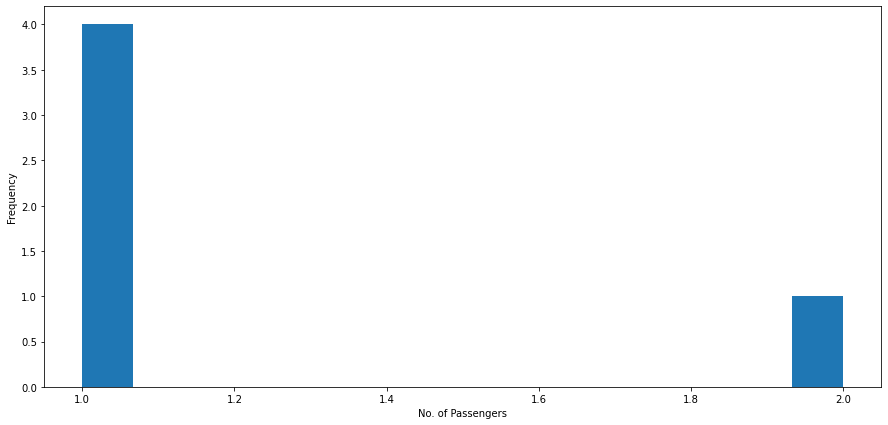

In [47]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

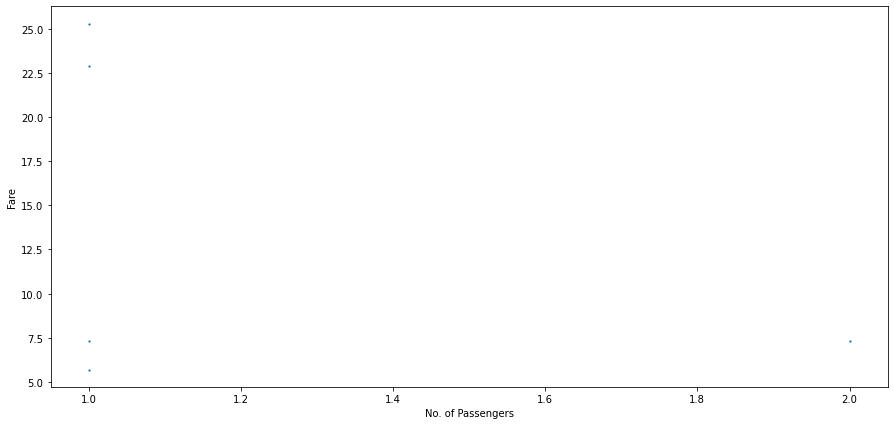

In [48]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

### From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

In [49]:
#2. Does the date and time of pickup affect the fare?

Text(0, 0.5, 'Fare')

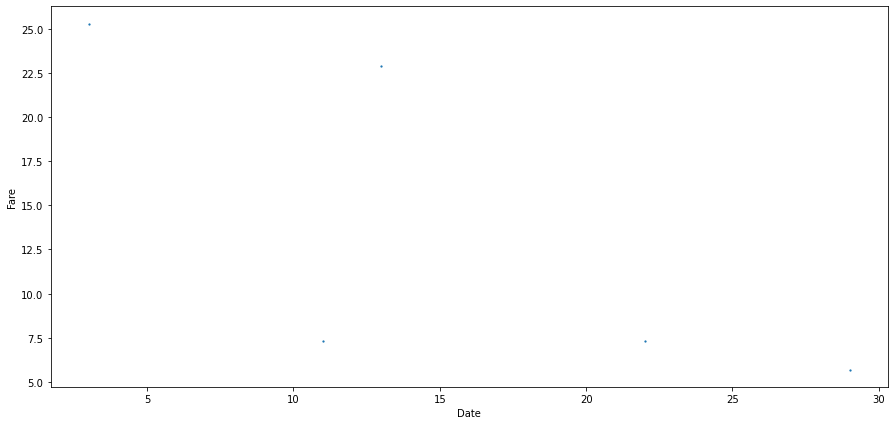

In [50]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')


In [51]:
#The fares throught the month mostly seem uniform, with the maximum fare received on the 12th

Text(0, 0.5, 'Frequency')

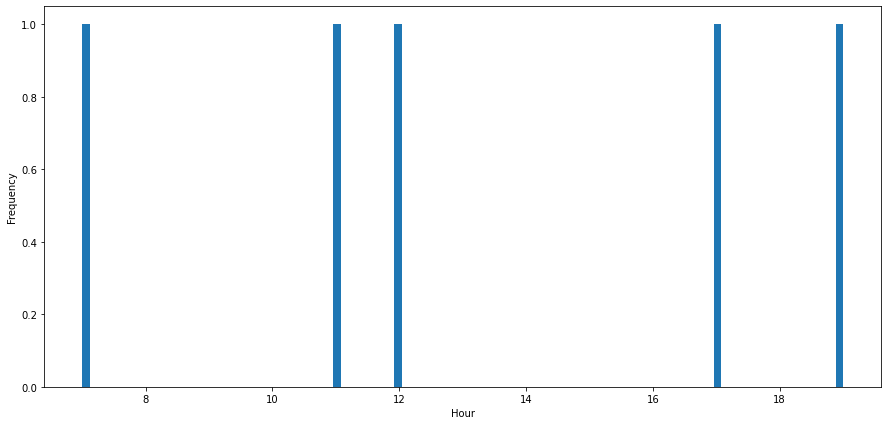

In [52]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

#### Interesting! The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

Text(0, 0.5, 'Fare')

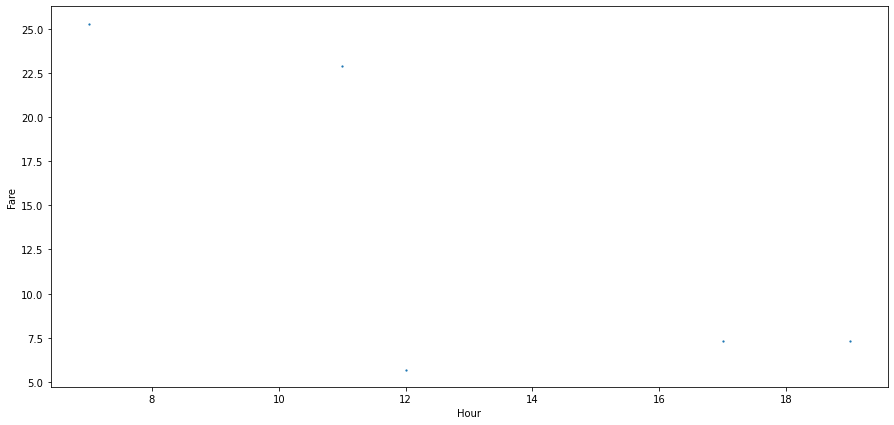

In [53]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')


The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic?

In [54]:

#3. Does the day of the week affect the fare?



Text(0, 0.5, 'Frequency')

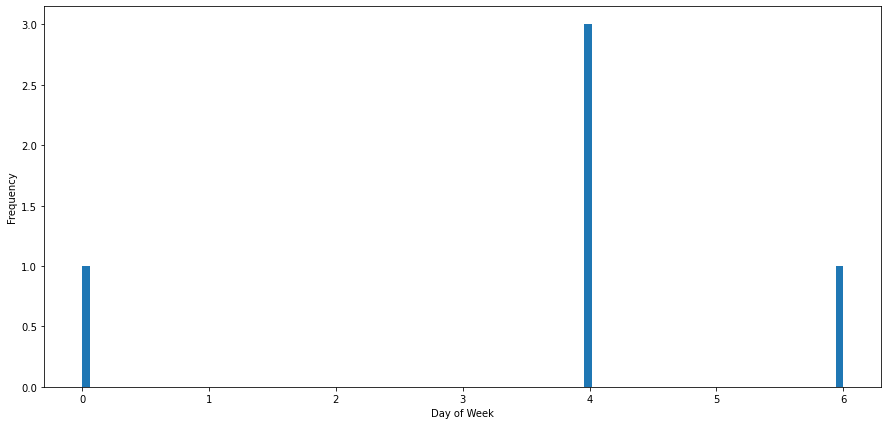

In [55]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')


Text(0, 0.5, 'Fare')

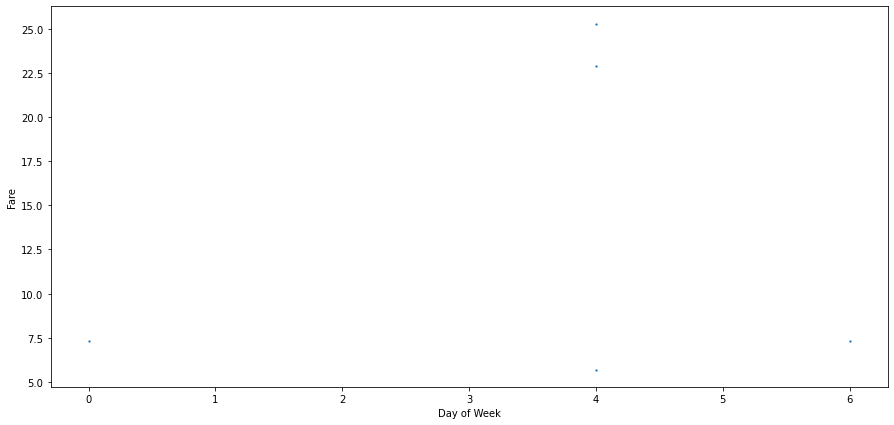

In [56]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday after a hectic week at work.


4. Does the distance affect the fare?

This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

Firstly, let's check the frequency of the distances that we calculated using Haversine formula. I will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [57]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [58]:
bins_4.head()

,H_Distance,bins


Text(0, 0.5, 'Frequency')

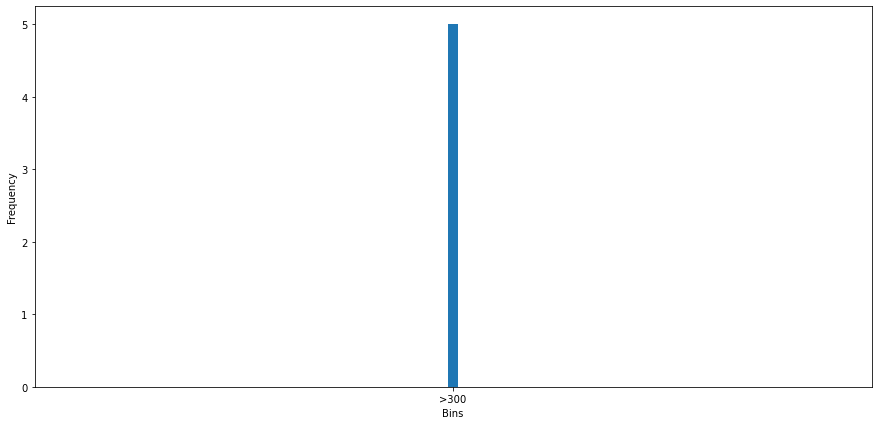

In [59]:
plt.figure(figsize=(15,7))
plt.hist(dist_bins['bins'], bins=75)
plt.xlabel('Bins')
plt.ylabel('Frequency')


In [60]:

Counter(dist_bins['bins'])

Counter({'>300': 5})

### There are values which are greater than 100 kms! In NYC I am not sure why people would take cabs to travel more than a 100 kms. Since the number of bins for 100-200 kms is quite high, I will keep these. These outliers could be because of typos or missing values in the latitude or longitude. Remove fields of the following -
 Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0
vice versa of point 1.
Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.


In [61]:
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [62]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [63]:
#1 row dropped
train.shape

(5, 14)

In [64]:
#Check in test data
test.loc[((test['pickup_latitude']==0) & (test['pickup_longitude']==0))&((test['dropoff_latitude']!=0) & (test['dropoff_longitude']!=0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [65]:
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [66]:

train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [67]:
train.shape


(5, 14)

In [68]:

#Checking test data
#Again no records! AWESOME!
test.loc[((test['pickup_latitude']!=0) & (test['pickup_longitude']!=0))&((test['dropoff_latitude']==0) & (test['dropoff_longitude']==0))]


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [69]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]


In [70]:
high_distance


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00+00:00,0.000000,-3116.285383,-73.953600,40.787998,1,7195.230186,2012,8,3,4,7
2037003,2011-05-22 17:08:00.000000163,7.3,2011-05-22 17:08:00+00:00,-2995.982437,-2847.702303,-1265.146753,-16.566552,1,9139.500576,2011,5,22,6,17
2983841,2011-07-29 12:02:00.000000930,5.7,2011-07-29 12:02:00+00:00,2130.812885,-1765.599020,3411.463838,-78.089012,1,15057.093688,2011,7,29,4,12
4214024,2012-01-13 11:07:00.000000139,22.9,2012-01-13 11:07:00+00:00,-915.660903,-823.300890,2820.124643,-44.476612,1,4105.230789,2012,1,13,4,11
4988718,2011-07-11 19:26:00.000000230,7.3,2011-07-11 19:26:00+00:00,-0.108333,-2875.666330,-74.001840,40.728355,2,8338.837257,2011,7,11,0,19



1938 rows! As you can see from the DF above, the abnormally high distances are due to either the pickup or dropoff co-ordinates being incorrect or 0. However, since all these values have fares, I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula

distance = (fare_amount - 2.5)/1.56

In [71]:

high_distance.shape


(5, 14)

In [72]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

In [73]:
high_distance


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
150559,2012-08-03 07:43:00.000000176,25.3,2012-08-03 07:43:00+00:00,0.000000,-3116.285383,-73.953600,40.787998,1,14.615385,2012,8,3,4,7
2037003,2011-05-22 17:08:00.000000163,7.3,2011-05-22 17:08:00+00:00,-2995.982437,-2847.702303,-1265.146753,-16.566552,1,3.076923,2011,5,22,6,17
2983841,2011-07-29 12:02:00.000000930,5.7,2011-07-29 12:02:00+00:00,2130.812885,-1765.599020,3411.463838,-78.089012,1,2.051282,2011,7,29,4,12
4214024,2012-01-13 11:07:00.000000139,22.9,2012-01-13 11:07:00+00:00,-915.660903,-823.300890,2820.124643,-44.476612,1,13.076923,2012,1,13,4,11
4988718,2011-07-11 19:26:00.000000230,7.3,2011-07-11 19:26:00+00:00,-0.108333,-2875.666330,-74.001840,40.728355,2,3.076923,2011,7,11,0,19


In [74]:
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance)


In [75]:
train.shape


(5, 14)

In [76]:
#Now we shall check for rows where the distance values are 0



In [77]:
train[train['H_Distance']==0]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


We can see a few rows with distance =0. This could be due to 2 reasons

The cab waited the whole time and the passenger eventually cancelled. That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time.
The pickup and drop co-ordinates were not entered. In other words, these are missing values!
28667 rows are too many rows to be deleted. We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

A quick Google search gave me the following prices -

$$2.5 base-price + $1.56/km --> 6AM to 8PM Mon-Fri

$$3.0 base-price + $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.

SCENARIO 1

Fare and Distance are both 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

In [78]:
train[(train['H_Distance']==0)&(train['fare_amount']==0)]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


#There are 4 rows. There 4 rows do not help us in anyway as we do not know either the distance or the fare to impute the missing values. So we shall drop them

In [79]:
train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [80]:

#4 rows dropped
train[(train['H_Distance']==0)].shape

(0, 14)

SCENARIO 2

Fare is not 0 and is less than the base amount, but Distance is 0.

Delete these rows as the minimum is $2.50, and these fares are incorrect values.

In [81]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train.loc[(((train['Hour']>=6)&(train['Hour']<=20)) & ((train['Day of Week']>=1) & (train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 2.5))]
rush_hour


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [82]:
train=train.drop(rush_hour.index, axis=0)


In [83]:
train.shape


(5, 14)

In [84]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train.loc[(((train['Hour']<6)|(train['Hour']>20)) & ((train['Day of Week']>=1)&(train['Day of Week']<=5)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [85]:
#Saturday and Sunday all hours
weekends = train.loc[((train['Day of Week']==0) | (train['Day of Week']==6)) & (train['H_Distance']==0) & (train['fare_amount'] < 3.0)]
weekends
#Counter(weekends['Day of Week'])
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


From scenario 2, I can understand that the distance is 0, but the fare is all the minimum fare of $2.5. This could be because the passenger booked the cab but ended up cancelling to pay the base fare (not sure how this works in NYC, but I'm assuming that's how it is)

SCENARIO 3

Fare is 0, but Distance is not 0. These values need to be imputed.

I can calculate the fare as I have the distance. I shall use the following formula

fare = 2.5 + 1.56(H_Distance)



In [86]:
train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [87]:
scenario_3 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [88]:
len(scenario_3)


0

In [89]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [92]:
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1)


ValueError: Columns must be same length as key

In [ ]:
scenario_3['fare_amount']


In [93]:
train.update(scenario_3)


In [94]:

train.shape

(5, 14)


SCENARIO 4

Fare is not 0, but Distance is 0. These values need to be imputed.



In [95]:
train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [96]:
scenario_4 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [97]:

len(scenario_4)

0

In [98]:

#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [99]:

scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]


In [100]:

len(scenario_4_sub)

0

In [101]:
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)


ValueError: Columns must be same length as key

In [102]:
train.update(scenario_4_sub)


PART 2 --> MODELLING AND PREDICTION

FINALLY! Data cleansing is done! Now to split the x and y variables and proceed to modelling. I shall use the random forest method for prediction

In [103]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day of Week',
       'Hour'],
      dtype='object')

In [104]:
test.columns


Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'Year', 'Month', 'Date', 'Day of Week', 'Hour'],
      dtype='object')

In [123]:
train.shape  , 400000,8 Train    y=3x+5
1000000, 8 test

(5000000, 8)

In [105]:
#not including the pickup_datetime columns as datetime columns cannot be directly used while modelling. Features need to extracted from the 
#timestamp fields which will later be used as features for modelling.
train = train.drop(['key','pickup_datetime'], axis = 1)
test = test.drop(['key','pickup_datetime'], axis = 1)

In [106]:
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values
x_test = test


In [107]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)



In [108]:
print(rf_predict)

[12.616 12.616 13.064 ... 14.576 17.792 13.308]


In [109]:

submission = pd.read_csv('sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('final_submission.csv', index=False)
submission.head(20)

,key,fare_amount
0,2015-01-27 13:08:24.0000002,12.616
1,2015-01-27 13:08:24.0000003,12.616
2,2011-10-08 11:53:44.0000002,13.064
3,2012-12-01 21:12:12.0000002,12.652
4,2012-12-01 21:12:12.0000003,12.828
5,2012-12-01 21:12:12.0000005,12.828
6,2011-10-06 12:10:20.0000001,12.932
7,2011-10-06 12:10:20.0000003,16.076
8,2011-10-06 12:10:20.0000002,11.864
9,2014-02-18 15:22:20.0000002,12.980
